Accuracy: 0.25


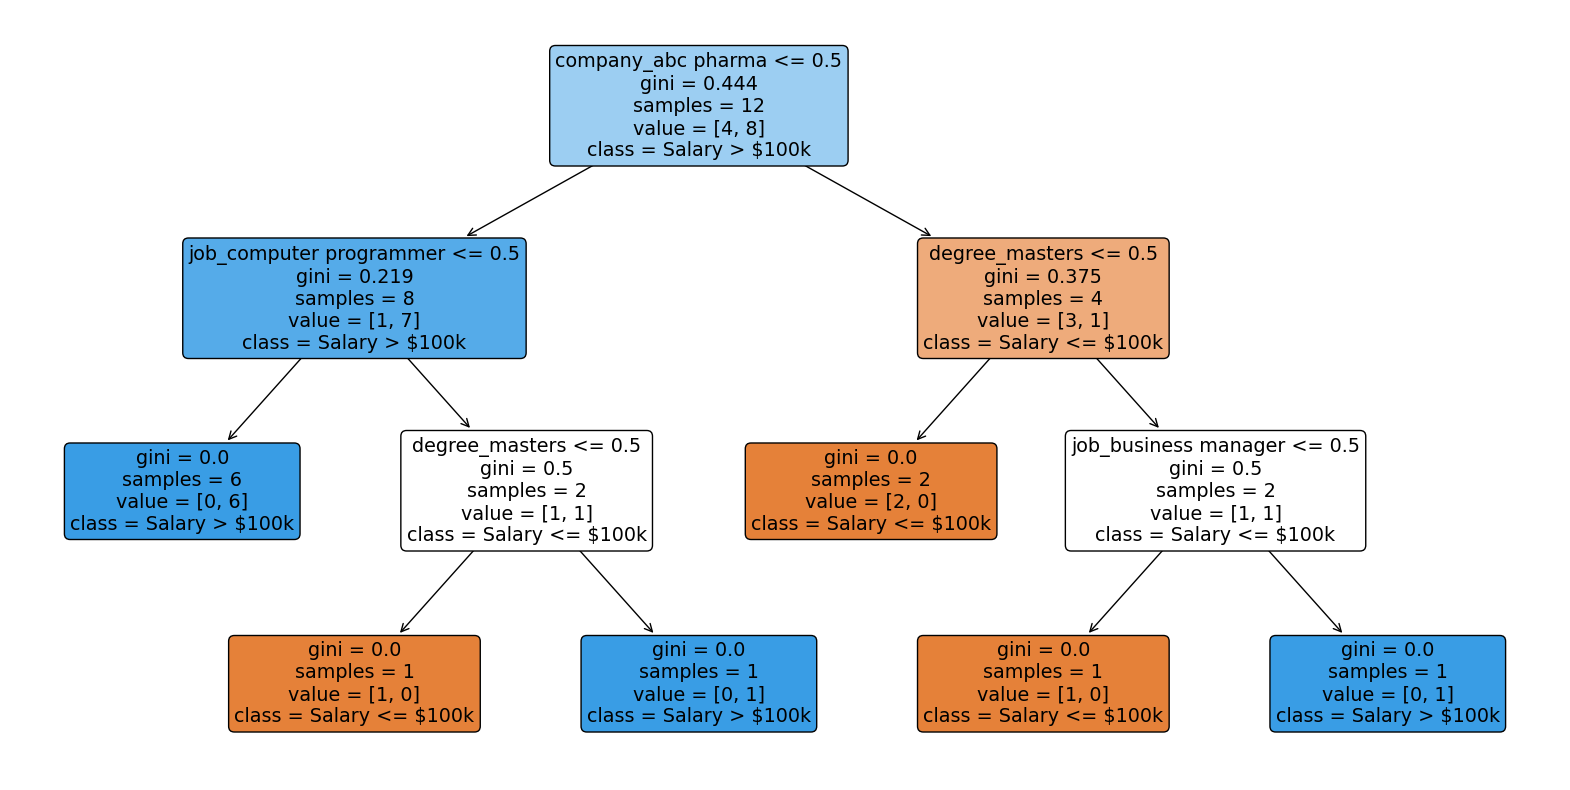

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# 1. Data Loading
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/salaries - salaries (1).csv")

# 2. Data Preprocessing
# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['company', 'job', 'degree'])

# Assuming 'features' contains the features and 'target' contains the target variable
X = data_encoded.drop(columns=['salary_more_then_100k'])
y = data_encoded['salary_more_then_100k']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Building
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. Model Evaluation
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# 5. Prediction
# You can now use the trained model to predict whether new employees' salaries are more than $100k

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotting the decision tree
plt.figure(figsize=(20, 10))  # Set the figure size
plot_tree(model, feature_names=X.columns, class_names=['Salary <= $100k', 'Salary > $100k'], filled=True, rounded=True)
plt.show()


Accuracy: 0.776536312849162


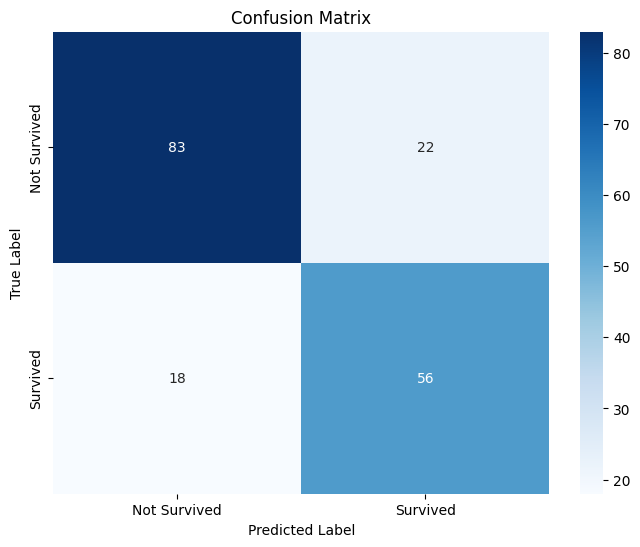

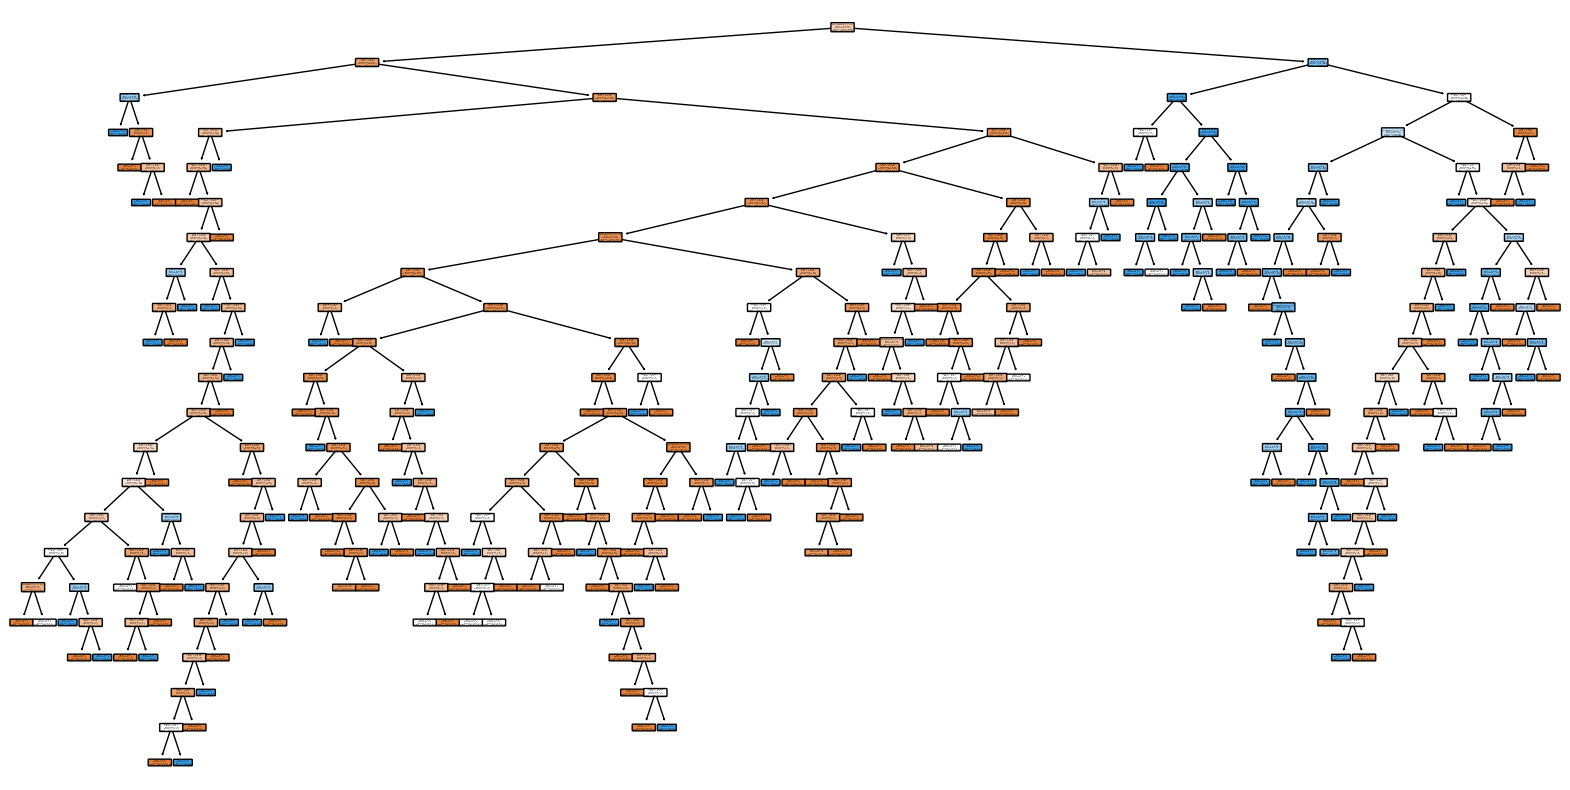

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Loading
titanic_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic - titanic.csv")

# 2. Data Preprocessing
# Make a copy of the DataFrame to avoid SettingWithCopyWarning
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()
y = titanic_data['Survived']

# Handle missing values and encode categorical variables
X['Age'].fillna(X['Age'].median(), inplace=True)  # Fill missing values in Age with median
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)  # Fill missing values in Embarked with mode

# Encoding categorical variables
X = pd.get_dummies(X, columns=['Sex', 'Embarked'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Building
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. Model Evaluation
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 5. Plot Decision Tree
plt.figure(figsize=(20, 10))  # Set the figure size
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()
